In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
def roll(probabilities):
    probs = probabilities.items()
    probs_sum = sum([prob[1] for prob in probs])
    probs = [(prob[0], prob[1] / probs_sum) for prob in probs]

    random_mass = random.random()
    mass = 0

    for prob in probs:
        mass += prob[1]
        if random_mass < mass:
            return prob

    return probs[-1]

In [3]:
def generate_random_graph(vertices_number, edge_probability):
    graph = nx.Graph()
    graph.add_nodes_from(range(vertices_number))

    for u in range(vertices_number):
        for v in range(u+1, vertices_number):
            if random.random() < edge_probability:
                graph.add_edge(u, v)

    return graph

In [4]:
def remove_edges_with_probability(graph, edge_remove_probability):
    edges_to_remove = []
    for edge in graph.edges():
        if random.random() < edge_remove_probability:
            edges_to_remove.append(edge)
    graph.remove_edges_from(edges_to_remove)

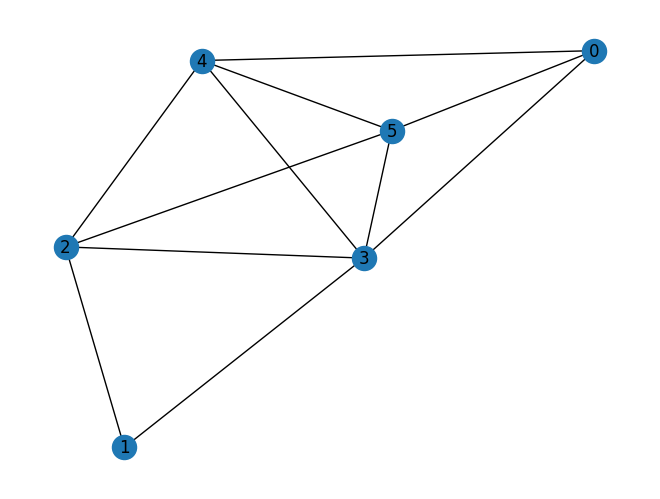

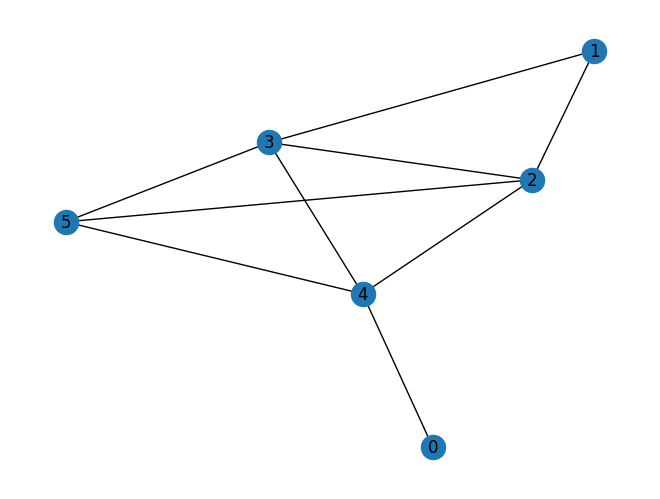

In [5]:
VERTICES_NUMBER = 6
ADD_EDGE_PROBABILITY = 0.8
REMOVE_EDGE_PROBABILITY = 0.2

random_graph = generate_random_graph(VERTICES_NUMBER, ADD_EDGE_PROBABILITY)
nx.draw(random_graph, with_labels=True)
plt.show()

remove_edges_with_probability(random_graph, REMOVE_EDGE_PROBABILITY)
nx.draw(random_graph, with_labels=True)
plt.show()

In [6]:
def random_subset(seq, m):
    targets = set()
    while len(targets) < m:
        x = random.choice(seq)
        targets.add(x)
    return targets

In [7]:
def barabasi_albert(n, m):
    if n < 0 or m < 1 or m >= n:
        raise nx.NetworkXError(
            f'Barabási-Albert network must have n >= 0 and m >= 1 and m < n, m = {m}, n = {n}'
        )
    
    G = nx.empty_graph(n)
    repeated_nodes = [n for n in G.nodes]
    source = 0
    while source < n:
        targets = random_subset(repeated_nodes, m)
        G.add_edges_from(zip([source] * m, targets))
        repeated_nodes.extend(targets)
        repeated_nodes.extend([source] * m)

        source += 1

    return G

In [8]:
def barabasi_albert_with_coloring(n, m, node_coloring_function, edge_coloring_function):
    if n < 0 or m < 1 or m >= n:
        raise nx.NetworkXError(
            f'Barabási-Albert network must have n >= 0 and m >= 1 and m < n, m = {m}, n = {n}'
        )
    
    G = nx.empty_graph(n)
    repeated_nodes = [n for n in G.nodes]
    source = 0
    while source < n:
        targets = random_subset(repeated_nodes, m)

        G.add_edges_from(zip([source] * m, targets))
        repeated_nodes.extend(targets)
        repeated_nodes.extend([source] * m)

        G.nodes[source]['color'] = node_coloring_function(G, source)
        for target in targets:
            G.edges[source, target]['color'] = edge_coloring_function(G, source, target)

        source += 1

    return G

In [9]:
def identity_coloring(color):
    return lambda G, *args: color

def edge_coloring_1(G, source, target):
    adjacency_edges = G.edges(source)
    adjacency_edges_colors = [G.edges[edge]['color'] for edge in adjacency_edges if 'color' in G.edges[edge]]
    distinct_colors = set(adjacency_edges_colors + ['red', 'green', 'blue', 'magenta'])
    colors_count = {color: 1 / (1 + adjacency_edges_colors.count(color))**2 for color in distinct_colors}

    return roll(colors_count)[0]

def edge_coloring_2(G, source, target):
    adjacency_edges = G.edges(source)
    adjacency_edges_colors = [G.edges[edge]['color'] for edge in adjacency_edges if 'color' in G.edges[edge]]
    distinct_colors = set(adjacency_edges_colors + ['red', 'green', 'blue', 'magenta'])
    colors_count = {color: 1 / (1 + adjacency_edges_colors.count(color))**2 for color in distinct_colors}

    return roll(colors_count)[0]

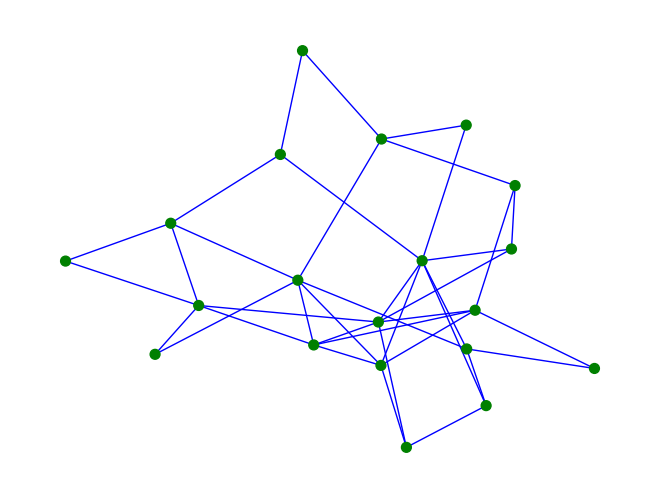

In [10]:
N = 20
M = 2

barabasi_albert_graph = barabasi_albert_with_coloring(N, M, identity_coloring('green'), identity_coloring('blue'))
node_colors = [barabasi_albert_graph.nodes[node]['color'] for node in barabasi_albert_graph.nodes]
edge_colors = [barabasi_albert_graph.edges[edge]['color'] for edge in barabasi_albert_graph.edges]

nx.draw(barabasi_albert_graph, with_labels=False, node_size=50, node_color=node_colors, edge_color=edge_colors)

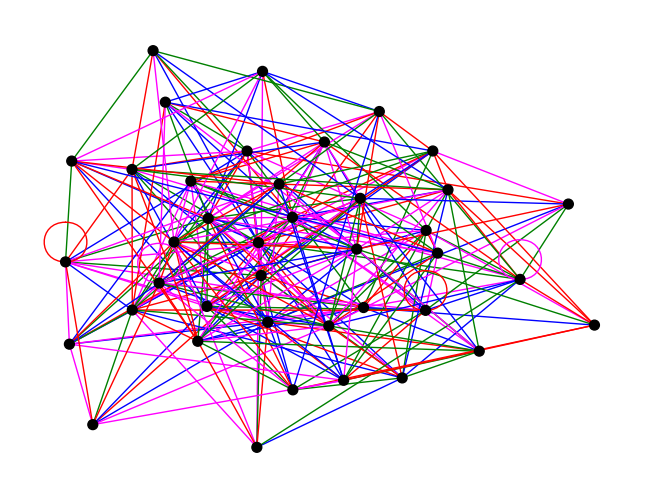

In [11]:
N = 40
M = 8
P = 0.2

barabasi_albert_graph = barabasi_albert_with_coloring(N, M, identity_coloring('black'), edge_coloring_2)
node_colors = [barabasi_albert_graph.nodes[node]['color'] for node in barabasi_albert_graph.nodes]
edge_colors = [barabasi_albert_graph.edges[edge]['color'] for edge in barabasi_albert_graph.edges]

nx.draw(barabasi_albert_graph, with_labels=False, node_size=50, node_color=node_colors, edge_color=edge_colors)


In [12]:
def sequence_random_graph(n, m, colors):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    
    current_nodes = [0]

    for _ in range(5):
        new_current_nodes = []
        for node in current_nodes:
            targets = random_subset(range(n), m)
            for target in targets:
                color = random.choice(colors)
                G.add_edge(node, target, color=color)
                if color == colors[0]:
                    new_current_nodes.append(target)
        current_nodes = new_current_nodes
    
    return G

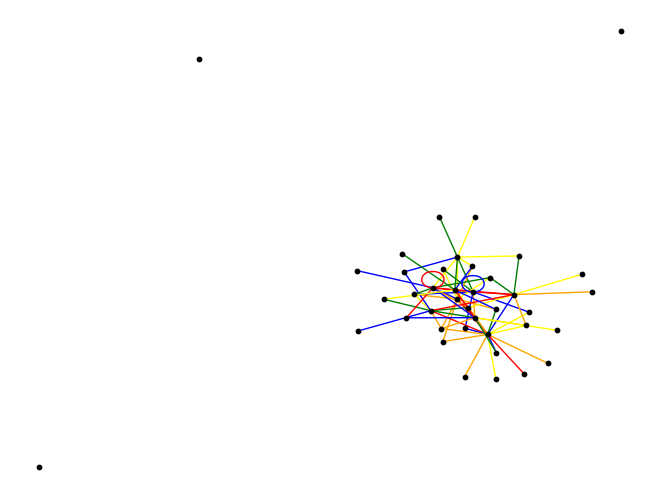

In [13]:

seq_random_graph = sequence_random_graph(N, M, ['red', 'green', 'blue', 'yellow', 'orange'])
edge_colors = [seq_random_graph.edges[edge]['color'] for edge in seq_random_graph.edges]
nx.draw(seq_random_graph, with_labels=False, node_size=10, node_color='black', edge_color=edge_colors)

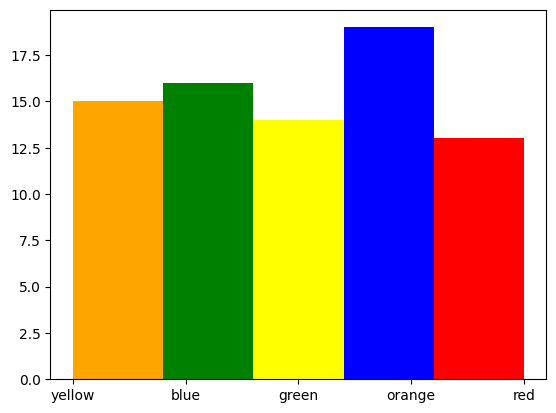

In [14]:

# create edge colors histogram
edge_colors = [seq_random_graph.edges[edge]['color'] for edge in seq_random_graph.edges]
edge_distinct_colors = list(set(edge_colors))
N, bins, patches = plt.hist(edge_colors, bins=len(edge_distinct_colors))

for i in range(5):
    patches[i].set_facecolor(edge_distinct_colors[i])


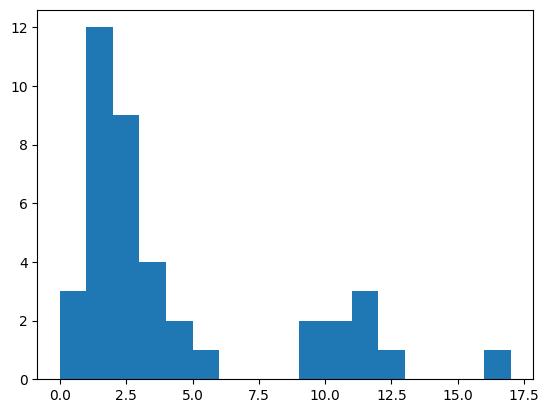

In [15]:

# create node degrees histogram
node_degrees = [seq_random_graph.degree(node) for node in seq_random_graph.nodes]
N, bins, patches = plt.hist(node_degrees, bins=range(max(node_degrees) + 2))